# Linear and Logistic Regression

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Importing the dataset

In [2]:
data=pd.read_csv('HRV.csv')

In [3]:
data.head()

,male,age,currentSmoker,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,285.0,130.0,84.0,23.10,85.0,85.0,0


## Dataset Preprocessing

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4234 entries, 0 to 4233
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   male           4234 non-null   int64  
 1   age            4234 non-null   int64  
 2   currentSmoker  4234 non-null   int64  
 3   totChol        4184 non-null   float64
 4   sysBP          4234 non-null   float64
 5   diaBP          4234 non-null   float64
 6   BMI            4215 non-null   float64
 7   heartRate      4233 non-null   float64
 8   glucose        3847 non-null   float64
 9   TenYearCHD     4234 non-null   int64  
dtypes: float64(6), int64(4)
memory usage: 330.9 KB


In [5]:
data.describe()

,male,age,currentSmoker,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4234.000000,4234.000000,4234.000000,4184.000000,4234.000000,4234.000000,4215.000000,4233.000000,3847.000000,4234.000000
mean,0.428909,49.583845,0.494095,236.723231,132.347780,82.886042,25.800624,75.882825,81.976085,0.151630
std,0.494979,8.575050,0.500024,44.608268,22.046338,11.911857,4.081183,12.031365,23.966195,0.358704
min,0.000000,32.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,1.000000,263.000000,144.000000,89.500000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [6]:
data.isnull().sum()

male               0
age                0
currentSmoker      0
totChol           50
sysBP              0
diaBP              0
BMI               19
heartRate          1
glucose          387
TenYearCHD         0
dtype: int64

In [7]:
# imputing missing data in totChol
chol_median=data['totChol'].median()

In [8]:
print(chol_median)

234.0


In [9]:
data['totChol']=data['totChol'].fillna(chol_median)

In [10]:
# imputing missing data in BMI
bmi_median=data['BMI'].median()
data['BMI']=data['BMI'].fillna(bmi_median)


In [11]:
# imputing missing data in glucose
glucose_median=data['glucose'].median()
data['glucose']=data['glucose'].fillna(glucose_median)

In [12]:
# imputing missing data in heartRate
heartrate_median=data['heartRate'].median()
data['heartRate']=data['heartRate'].fillna(heartrate_median)

In [13]:
data.isnull().sum()

male             0
age              0
currentSmoker    0
totChol          0
sysBP            0
diaBP            0
BMI              0
heartRate        0
glucose          0
TenYearCHD       0
dtype: int64

## A. Linear Regression - Create a model to predict the cholestrol level of a person

### Create independent and dependent variables to predict 

In [14]:
x=data[['male','age','currentSmoker','sysBP','diaBP','BMI','heartRate','glucose','TenYearCHD']]
y=data[['totChol']]

In [15]:
data.columns

Index(['male', 'age', 'currentSmoker', 'totChol', 'sysBP', 'diaBP', 'BMI',
       'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

## Splitting the dataset into the Training set and Test set

In [16]:
from sklearn.model_selection import train_test_split
# creating test set variables that are one fifth the size of orignal data frame
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.20, random_state=0)

## Training the Linear Regression model 

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
regressor = LinearRegression()
# .fit() to train your model
regressor.fit(x_train.values,y_train)

LinearRegression()

In [35]:
y_pred=regressor.predict(x_test.values)

## Model performance check- R Square and RMSE score

In [36]:
from sklearn.metrics import mean_squared_error, r2_score
import math

In [21]:
print(f"MSE {mean_squared_error(y_test,y_pred):.2f}")
print(f"RMSE {math.sqrt(mean_squared_error(y_test,y_pred)):.2f}")
print(f"R-squared: {r2_score(y_test, y_pred):.2f}")

MSE 2045.40
RMSE 45.23
R-squared: 0.06


## Predicting new results where the actual results are given
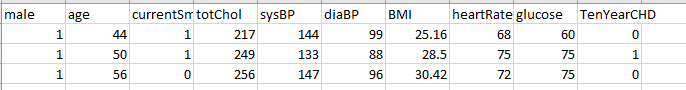

In [22]:
# case 1 actual 217
case1=regressor.predict([[1,44,1,144,99,25.16,68,60,0]])
print('The expexted value of case 1 is',case1)

The expexted value of case 1 is [[229.38466847]]


In [23]:
# case 2 actual 249
case2=regressor.predict([[1,50,1,133,88,28.5,75,75,1]])
print('The expexted value of case 2 is',case2)

The expexted value of case 2 is [[236.92492778]]


In [24]:
# case 3 actual 256
case3=regressor.predict([[1,56,0,147,96,30.42,72,75,0]])
print('The expexted value of case 3 is',case3)

The expexted value of case 3 is [[245.14974891]]


## B. Logistic Regression - Create a model to predict the 10 year risk of coronary heart disease CHD of a person

In [25]:
data.columns

Index(['male', 'age', 'currentSmoker', 'totChol', 'sysBP', 'diaBP', 'BMI',
       'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

### Create independent and dependent variables to predict

In [26]:
x2=data[['male', 'age', 'currentSmoker', 'totChol', 'sysBP', 'diaBP', 'BMI',
       'heartRate', 'glucose']]
y2=data[['TenYearCHD']]

## Splitting the dataset into the Training set and Test set

In [31]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x2,y2,test_size=.20,random_state=0)

## Training the Logistic Regression model 

In [32]:
from sklearn.linear_model import LogisticRegression

In [38]:
classifier=LogisticRegression(max_iter=1000)
classifier.fit(x_train.values,y_train)
y_pred=classifier.predict(x_test.values)

/Users/jamesonbuie/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Model Performance check using Confusion matrix, Confusion matrix display and classification report

In [39]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[714   6]
 [123   4]]


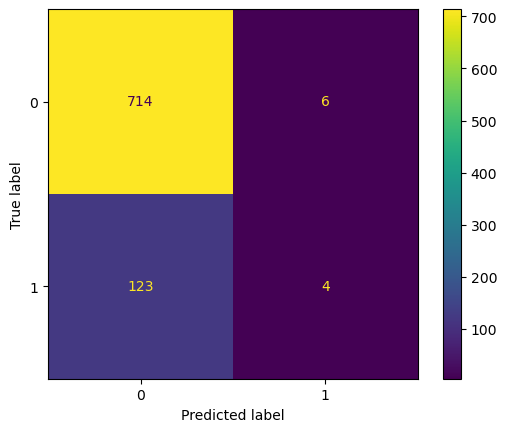

In [40]:
display=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)
display.plot()
plt.show()

In [45]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.99      0.92       720
           1       0.40      0.03      0.06       127

    accuracy                           0.85       847
   macro avg       0.63      0.51      0.49       847
weighted avg       0.79      0.85      0.79       847



### Discuss the results

#### Our predictor linear logistic model shows that we have 714 true negative reponses. This means that the model was very good at predicting that a person would not have TenYearCHD. However, we also have 123 false negatives, which means that the model predicted a person did not have the disease when they actually did. This means that the model might be dangerous if it is predicting so many false negatives. There are very few true positives and false positives because there are much fewer positives being predicted by the model . This is not a very efficient model because too many false negatives are being predicted. 

## Predicting new results where the actual results are given
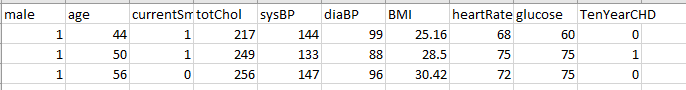

In [42]:
# case 1
case_1=classifier.predict([[1,44,1,217,144,99,25.16,68,60]])
print('The expected value for case 1 is',case_1)

The expected value for case 1 is [0]


In [43]:
case_2=classifier.predict([[1,50,1,249,133,88,28.5,75,75]])
print('The expected value for case 2 is',case_2)

The expected value for case 2 is [0]


In [44]:
case_3=classifier.predict([[1,56,0,256,147,96,30.42,72,75]])
print('The expected value for case 3 is',case_3)

The expected value for case 3 is [0]


### Summary

### For the preprocessing of our data, we noticed there were four columns with null values. We imputed the null values with the median for each column. Next, we categorized the variables into indpenedent and dependent variables to build our linear regression model. Then we split 20% of the data into a training set and trained it using the LinearRegression program from sklearn. After testing our model , we got an R-squared value of 0.06. This is a very low value, so our model is not very good for predicting using multiple linear regression. 

### For our logistic regression model, we split the data into independent and dependent variables and split it into a training and test set just like we did before. Then after testing, we made a confusion matrix. This matrix showed that our model predicted mostly negative values, and very few positive values. We decided that 123 false negative results is dangerous when predicting heart disease. The f1-score also shows that the dataset is very imbalanced and there are not enough positive values in the dataset to train the model properly